In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
INPUT_PATH = './example/source.png'
SOURCE_PATH = './example/target.png'
INPUT_PATH2 = './example/source.jpeg'
SOURCE_PATH2 = './example/target.jpeg'

In [3]:
inputImage = cv2.imread(SOURCE_PATH)
sourceImage = cv2.imread(SOURCE_PATH2)

#### Target

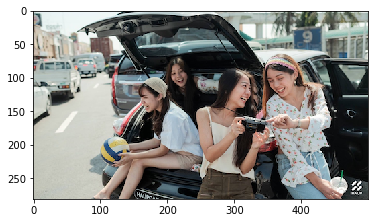

In [4]:
plt.imshow(cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB))

#### Source

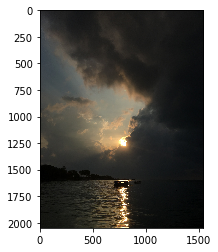

In [5]:
plt.imshow(cv2.cvtColor(sourceImage,cv2.COLOR_BGR2RGB))

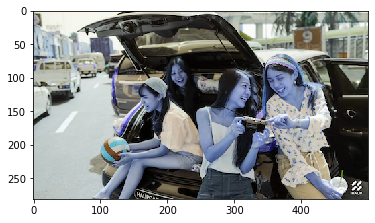

In [6]:
plt.imshow(inputImage)

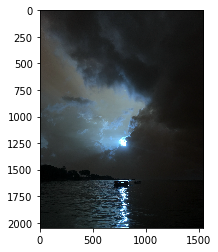

In [7]:
plt.imshow(sourceImage)

In [8]:
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2LAB).astype("float32")
sourceImage = cv2.cvtColor(sourceImage, cv2.COLOR_BGR2LAB).astype("float32")

#### Calculate Mean and Standard Deviation

In [9]:
def image_stats(image):
    (l, a, b) = cv2.split(image)
    (lMean, lStd) = (l.mean(), l.std())
    (aMean, aStd) = (a.mean(), a.std())
    (bMean, bStd) = (b.mean(), b.std())
    return (lMean, lStd, aMean, aStd, bMean, bStd)

In [10]:
(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(sourceImage)
(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(inputImage)

#### Split Channel

In [11]:
(l, a, b) = cv2.split(inputImage)

#### Subtract the means from the target image

In [12]:
l -= lMeanTar
a -= aMeanTar
b -= bMeanTar

#### Scale by Standard Deviation

In [13]:
l = (lStdTar / lStdSrc) * l
a = (aStdTar / aStdSrc) * a
b = (bStdTar / bStdSrc) * b

#### Add in source mean

In [14]:
l += lMeanSrc
a += aMeanSrc
b += bMeanSrc

#### Scale back to [0,255]

In [15]:
def _scale_array(arr, clip=True):
    if clip:
        scaled = np.clip(arr, 0, 255)
    else:
        scale_range = (max([arr.min(), 0]), min([arr.max(), 255]))
        scaled = _min_max_scale(arr, new_range=scale_range)
    return scaled

In [16]:
l = _scale_array(l)
a = _scale_array(a)
b = _scale_array(b)

#### Merge L A B back

In [17]:
transfer = cv2.merge([l, a, b])

#### Convert to Back to RGB

In [18]:
transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)

In [19]:
# transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_BGR2RGB)

#### Result

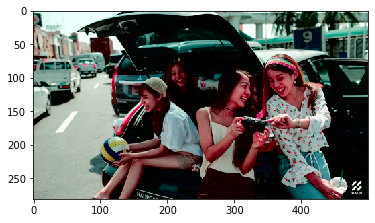

In [20]:
plt.imshow(cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_BGR2RGB))

In [21]:
cv2.imwrite('output.jpg', transfer)

True